In [141]:
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

In [142]:
!ls

Boot_an.ipynb              result_jackknife100_05.csv
result_bootstrap100.csv


In [143]:
boot_file_name = "result_bootstrap100.csv"
jack_file_name = "result_jackknife100_05.csv"

In [144]:
example_str = '/HOME/indy/gcg_wif/sas/Trees/2016/ForPaper/Fungi/Selections30/Trees/PQ/bootstrap100//PF00270_14.tre;"2;9;9;9;8;8;6;6;6;9;9;9;9;7;7;7;5;4;4;4;4;3;5;5;4;4;4;2;1;1";"8;8;8;8;6;7;7;6;5;5;5;5;4;3;3;3;1;1;3;4;4;4;5;8;8;7;8;8;8;8";100.0'
regex = re.compile(r"(?P<tree_path>[^;]+);\"(?P<tree_leaves_deep>[^\"]+)\";\"(?P<etalon_leaves_deep>[^\"]+)\";(?P<boot_score>[0-9\.]+)")
print regex.match(example_str).group("boot_score")

100.0


In [36]:
boot_data = []
with open(boot_file_name, "r") as boot_file:
    _ = boot_file.readline() # pass header
    for line in boot_file:
        match = regex.match(line)
        if match:
            boot_data.append( (float(match.group("boot_score")), 0 if match.group("etalon_leaves_deep") == "None" else 1))
        else:
            print line
            raise Exception("Wrong format of file")
        

In [131]:
boot_score = np.array([x for x,y in boot_data])
is_true = np.array([y for x, y in boot_data])

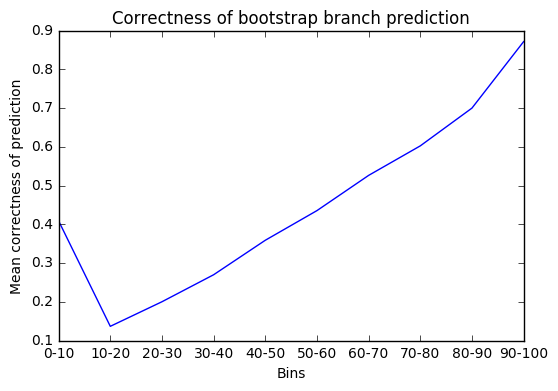

In [132]:
bins = np.linspace(0, 100, 10, endpoint=False)
step = float(bins[1] - bins[0])
pos = np.digitize(boot_score, bins)
mean_is_true = np.zeros(len(bins))

for i, b in enumerate(bins, start = 1):
    mean_is_true[i - 1] = np.mean(is_true[pos == i])

plt.title("Correctness of bootstrap branch prediction")
plt.plot(mean_is_true)
plt.xlabel("Bins")
plt.ylabel("Mean correctness of prediction")
plt.xticks(np.arange(len(mean_is_true)), ["{:.0f}-{:.0f}".format(x * step , (x + 1) * step) for x in xrange(len(mean_is_true))])
plt.show()    


In [137]:
jack_data = []
with open(jack_file_name, "r") as boot_file:
    _ = boot_file.readline() # pass header
    for line in boot_file:
        match = regex.match(line)
        if match:
            jack_data.append( (float(match.group("boot_score")), 0 if match.group("etalon_leaves_deep") == "None" else 1))
        else:
            raise Exception("Wrong format of file")
        

In [139]:
boot_score = np.array([x for x,y in jack_data])
is_true = np.array([y for x, y in jack_data])

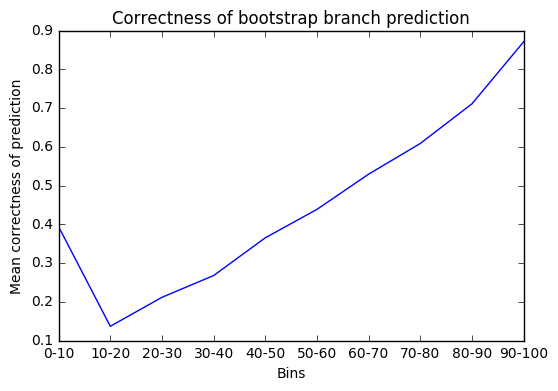

In [140]:
bins = np.linspace(0, 100, 10, endpoint=False)
step = float(bins[1] - bins[0])
pos = np.digitize(boot_score, bins)
mean_is_true = np.zeros(len(bins))

for i, b in enumerate(bins, start = 1):
    mean_is_true[i - 1] = np.mean(is_true[pos == i])

plt.title("Correctness of jackknife branch prediction")
plt.plot(mean_is_true)
plt.xlabel("Bins")
plt.ylabel("Mean correctness of prediction")
plt.xticks(np.arange(len(mean_is_true)), ["{:.0f}-{:.0f}".format(x * step , (x + 1) * step) for x in xrange(len(mean_is_true))])
plt.show()    